In [1]:
import sklearn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Advertising and Sales
Source: https://www.kaggle.com/sazid28/advertising.csv/downloads/advertising.csv.zip/1

Data Fields:

TV -- amount spend on TV ads on sales in dollars.
radio -- amount spend on radio ads on sales in dollars.
newspaper -- amount spend on newspaper ads on sales in dollars.
sales --- sale in dollars.

In [2]:
advertising_data = pd.read_csv('dataset/Advertising.csv', index_col=0)
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
advertising_data.shape

(200, 4)

In [4]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visualizing relationships

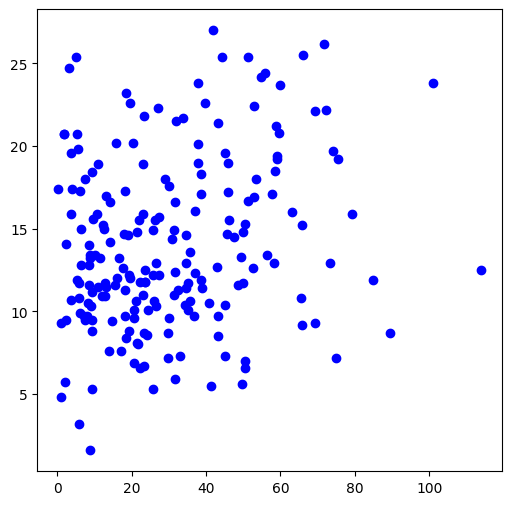

In [5]:
plt.figure(figsize=(6, 6))

plt.scatter(advertising_data['newspaper'], advertising_data['sales'], c='b')

plt.show()

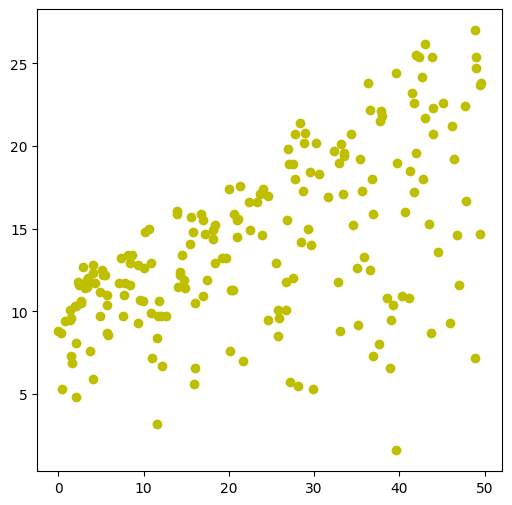

In [9]:
plt.figure(figsize=(6, 6))

plt.scatter(advertising_data['radio'], advertising_data['sales'], c='y')

plt.show()

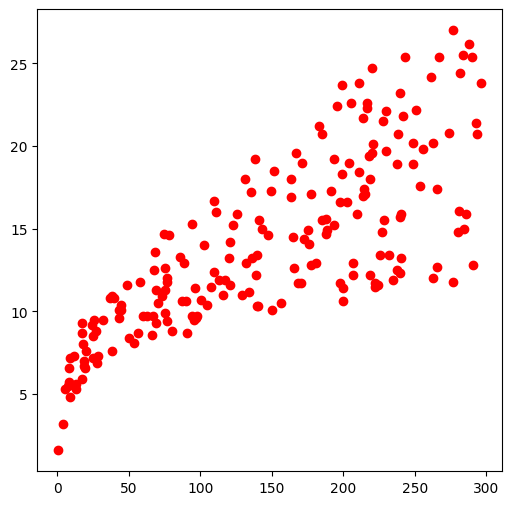

In [12]:
plt.figure(figsize=(6, 6))

plt.scatter(advertising_data['TV'], advertising_data['sales'], c='r')

plt.show()

In [11]:
advertising_data_correlation = advertising_data.corr()

advertising_data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

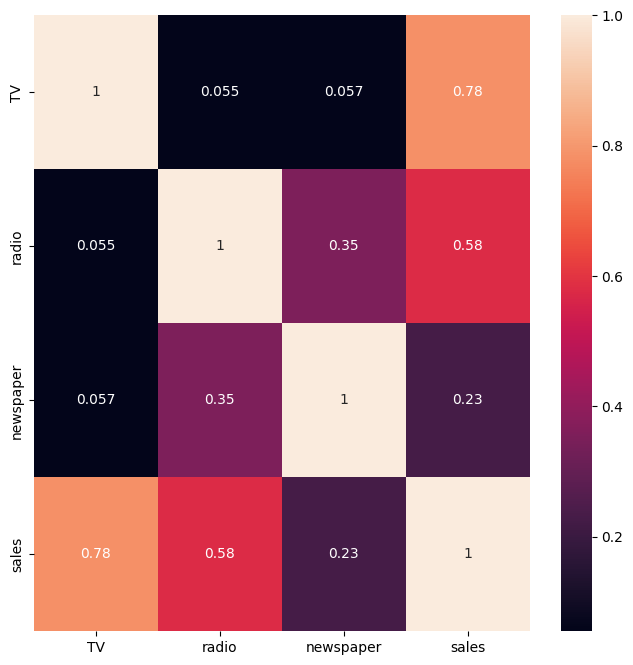

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(advertising_data_correlation, annot=True)

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

##### This time we are taking only one variable TV ads for predicting the sale

In [17]:
X = advertising_data['TV'].values.reshape(-1, 1)

Y = advertising_data['sales'].values.reshape(-1, 1)

In [18]:
X.shape, Y.shape

((200, 1), (200, 1))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [20]:
x_train.shape, y_train.shape

((140, 1), (140, 1))

In [21]:
x_test.shape, y_test.shape

((60, 1), (60, 1))

### Statsmodels Regression Result

In [24]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           4.76e-26
Time:                        21:08:47   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

### Single Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#### Train a model for predicting the sale

In [26]:
linear_reg = LinearRegression().fit(x_train, y_train)

linear_reg

LinearRegression()

### r_2 Score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [27]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.5552336104251211


In [28]:
y_pred = linear_reg.predict(x_test)

In [29]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.725606346597073


##### Defining a function for calculating the adjusted r_2 score

In [30]:
def adjusted_r2(r_square, labels, features):
    
    adj_r_square = 1 - ((1 - r_square) * (len(labels) - 1)) / (len(labels) - features.shape[1] - 1)
    
    return adj_r_square

In [31]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.7208754215384019


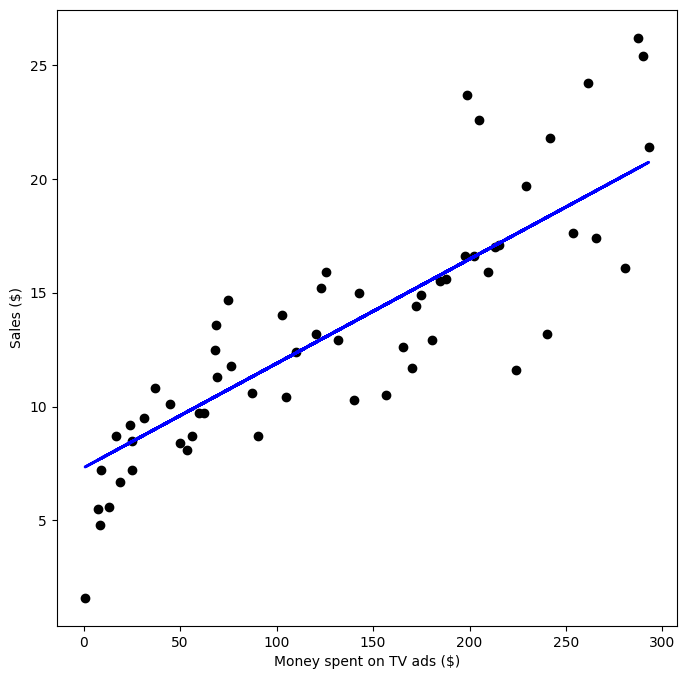

In [32]:
plt.figure(figsize=(8, 8))

plt.scatter(x_test,
            y_test,
            c='black')

plt.plot(x_test,
         y_pred,
         c='blue',
         linewidth=2)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

plt.show()

### Multiple Linear Regression

##### This time we are taking multiple variables ( TV, radio and newspaper ads) for predicting the sales

In [33]:
X = advertising_data.drop('sales', axis=1)

Y = advertising_data['sales']

In [34]:
X.head(5)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [206]:
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [42]:
x_train.shape, y_train.shape

((140, 3), (140,))

In [43]:
x_test.shape, y_test.shape

((60, 3), (60,))

### Statsmodels Regression Result

In [44]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     391.7
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.07e-66
Time:                        17:27:05   Log-Likelihood:                -274.62
No. Observations:                 140   AIC:                             557.2
Df Residuals:                     136   BIC:                             569.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7279      0.386      7.067      0.0

In [46]:
linear_reg = LinearRegression().fit(x_train, y_train)

linear_reg

LinearRegression()

In [47]:
print("Training_score : " , linear_reg.score(x_train, y_train))

Training_score :  0.8962711444506674


In [48]:
predictors = x_train.columns

coef = pd.Series(linear_reg.coef_, predictors).sort_values()

print(coef)

newspaper   -0.002560
TV           0.046628
radio        0.192478
dtype: float64


In [49]:
y_pred = linear_reg.predict(x_test)

In [50]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.8971222282206209


In [51]:
print("Adjusted_r2_score : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

Adjusted_r2_score :  0.8916109190181541


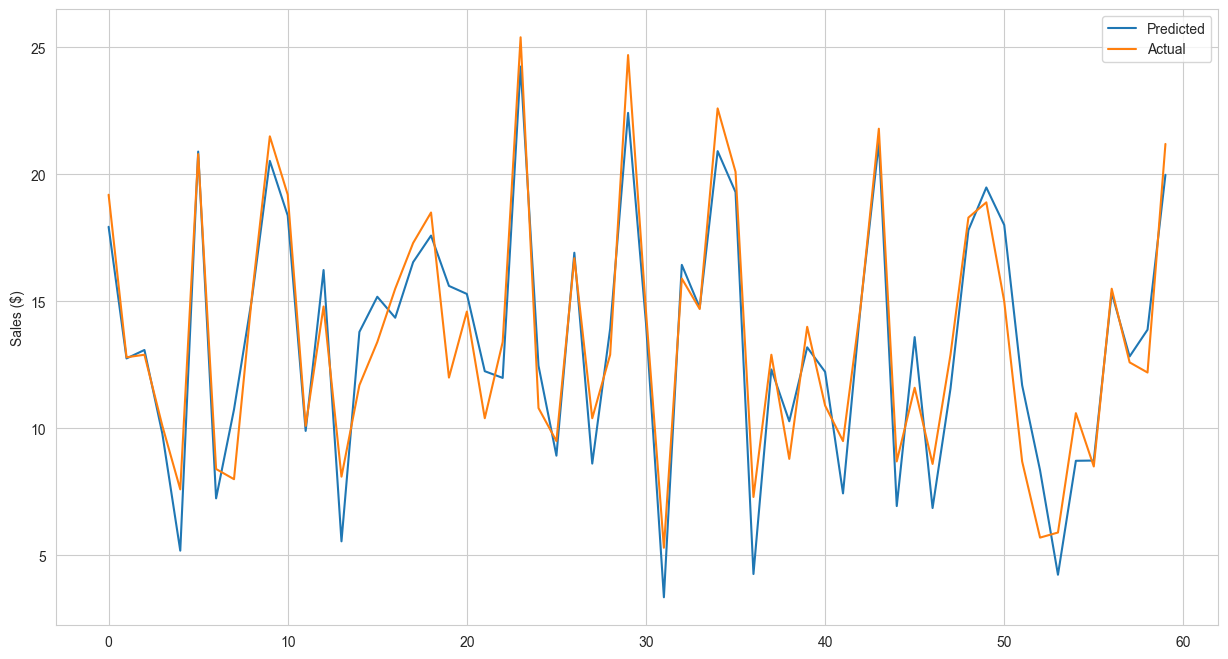

In [52]:
plt.figure(figsize = (15, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel("Sales ($)")
plt.legend()
plt.show()